In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
import sys
import nltk

In [3]:
DATASET_DIR='Dataset and discription/'

In [4]:
X = pd.read_csv(os.path.join(DATASET_DIR, 'training_set_rel3.tsv'), sep='\t', encoding='ISO-8859-1')

In [5]:
X.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
X=X.dropna(axis=1)

In [7]:
X=X.drop(columns=['rater1_domain1','rater2_domain1'])

In [8]:
X

,essay_id,essay_set,essay,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",8
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10
4,5,1,"Dear @LOCATION1, I know having computers has a...",8
...,...,...,...,...
12971,21626,8,In most stories mothers and daughters are eit...,35
12972,21628,8,I never understood the meaning laughter is th...,32
12973,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",40
12974,21630,8,Trippin' on fen...,40


In [9]:
Y=X['domain1_score']

In [10]:
minimum_scores = np.array([-1, 2, 1, 0, 0, 0, 0, 0, 0])
maximum_scores = np.array([-1, 12, 6, 3, 3, 4, 4, 30, 60])

In [11]:
old_min = minimum_scores[X['essay_set']]
old_max = maximum_scores[X['essay_set']]
old_range = old_max - old_min 
new_range = (10 - 0)  
X['score'] = np.around((((X['domain1_score'] - old_min) * new_range) / old_range) )

X

,essay_id,essay_set,essay,domain1_score,score
0,1,1,"Dear local newspaper, I think effects computer...",8,6.0
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,7.0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7,5.0
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10,8.0
4,5,1,"Dear @LOCATION1, I know having computers has a...",8,6.0
...,...,...,...,...,...
12971,21626,8,In most stories mothers and daughters are eit...,35,6.0
12972,21628,8,I never understood the meaning laughter is th...,32,5.0
12973,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",40,7.0
12974,21630,8,Trippin' on fen...,40,7.0


In [12]:
from nltk.corpus import stopwords
import nltk

import re
def wordlist(essay, remove_stopwords):
    
    essay = re.sub("[^a-zA-Z]", " ", essay)
    words = essay.lower().split()
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    return (words)

In [13]:
def Make_sentences(essay, remove_stopwords):
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    raw_sentences = tokenizer.tokenize(essay.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(wordlist(raw_sentence, remove_stopwords))
    return sentences

In [14]:
def makeFeatureVec(words, model, num_features):
    
    featureVec = np.zeros((num_features),dtype="float32")
    num_words = 0.
    index2word_set = set(model.wv.index_to_key)
    for word in words:
        if word in index2word_set:
            num_words += 1
            featureVec = np.add(featureVec,model.wv[word])        
    featureVec = np.divide(featureVec,num_words)
    return featureVec

In [15]:
def getAvgFeatureVecs(essays, model, num_features):

    counter = 0
    essayFeatureVecs = np.zeros((len(essays),num_features),dtype="float32")
    for essay in essays:
        essayFeatureVecs[counter] = makeFeatureVec(essay, model, num_features)
        counter = counter + 1
    return essayFeatureVecs

In [16]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Lambda, Flatten
from tensorflow.keras.models import Sequential, load_model, model_from_config
import tensorflow.keras.backend as K

def get_model():
    """Define the model."""
    model = Sequential()
    model.add(LSTM(300, dropout=0.2, recurrent_dropout=0.3, input_shape=[1, 300], return_sequences=True))
    model.add(LSTM(64, recurrent_dropout=0.3))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='relu'))

    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    model.summary()

    return model

In [17]:
pip install -U gensim

Requirement already up-to-date: gensim in /home/shreyash/anaconda3/lib/python3.7/site-packages (4.0.1)
Note: you may need to restart the kernel to use updated packages.


In [18]:
from sklearn.model_selection import StratifiedKFold
from keras.callbacks import ModelCheckpoint
from sklearn.linear_model import LinearRegression
from sklearn.metrics import cohen_kappa_score
import nltk
from gensim.models import Word2Vec
skf = StratifiedKFold(n_splits=5,shuffle=True)
count=1
results=[]
for train,test in skf.split(X,Y):
        print("\n--------Fold {}--------\n".format(count))
        X_test, X_train, y_test, y_train = X.iloc[test], X.iloc[train], Y.iloc[test], Y.iloc[train]
        trainE = X_train['essay']
        testE= X_test['essay']
        sentences=[]
        for essay in trainE:
        # Obtaining all sentences from the training essays.
        
            sentences +=Make_sentences(essay, remove_stopwords = True)
        
        #Initializing different parameters for the word2vec model to be used
    
        num_features = 300
        min_word_count = 40
        num_workers = 4
        context = 10
        downsampling = 1e-3

        print("Training Word2Vec Model...")
        
        #Initializing model fro vectorization
        
    
        #initializing model and loading parameters
    
        model = Word2Vec(sentences,vector_size=300, workers=num_workers, min_count = min_word_count, window = context)
        #avoiding normalization to not reduce the essence of some words used in context
    
        model.init_sims(replace=False)
    
        #saving model
    
        model.wv.save_word2vec_format('word2vecmodel.bin', binary=True)
        
        print("--------------- Traning complete-------------------")
        
        print("--------------- Initializing vectorization on train set -------------------")
        
        
        #generating vectors train
    
        clean_train = []
        for essay in trainE:
            clean_train.append(wordlist(essay, remove_stopwords=True))
        trainDataVecs = getAvgFeatureVecs(clean_train, model, num_features)
    
        print("--------------completed-----------------")
    
        print("--------------- Initializing vectorization on test set -------------------")
        
        #generating vectors for test
    
        clean_test = []
        for essay in testE:
            clean_test.append(wordlist(essay, remove_stopwords=True))
        testDataVecs = getAvgFeatureVecs(clean_test, model, num_features)
        
        trainDataVecs = np.array(trainDataVecs)
        testDataVecs = np.array(testDataVecs)
        
        print("------------Complete----------------------") 
        
        print("------------Adding extra dimension to essay----------------------") 
        
        #Adding extra dimension to essay
        
        trainDataVecs = np.reshape(trainDataVecs, (trainDataVecs.shape[0], 1, trainDataVecs.shape[1]))
        
        testDataVecs = np.reshape(testDataVecs, (testDataVecs.shape[0], 1, testDataVecs.shape[1]))
        
        print("------------Complete----------------------") 
        
        print("------------Traning the Preprocessed Data----------------------") 
        
        #Traning the Preprocessed Data
        
        lstm_model = get_model()
        
        print('-----------Complete--------------')
        
        print('------------------fitting data----------------------')
        
        #fitting dataset
        checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
        history=lstm_model.fit(trainDataVecs, y_train, batch_size=64, epochs=40,callbacks=[checkpoint],validation_split=0.1)
        
        print('-----------Complete--------------')
        
        print('---------------Predicting test set------------------------')
        
        #predicting test
        
        y_pred = lstm_model.predict(testDataVecs)
    
        # Save any one of the 8 models.
        
        if count == 5:
             lstm_model.save('./final_lstm.h5')
            
        # Round y_pred to the nearest integer.
        y_pred = np.around(y_pred)
    
            # Evaluate the model on the evaluation metric. "Quadratic mean averaged Kappa"
        result = cohen_kappa_score(y_test.values,y_pred,weights='quadratic')
        print("Kappa Score: {}".format(result))
        results.append(result)

        count += 1


/home/shreyash/anaconda3/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/home/shreyash/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



--------Fold 1--------

Training Word2Vec Model...


/home/shreyash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).


--------------- Traning complete-------------------
--------------- Initializing vectorization on train set -------------------
--------------completed-----------------
--------------- Initializing vectorization on test set -------------------
------------Complete----------------------
------------Adding extra dimension to essay----------------------
------------Complete----------------------
------------Traning the Preprocessed Data----------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 300)            721200    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                93440     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
__________________________________________________________

Epoch 28/40
146/146 [==============================] - 2s 12ms/step - loss: 1.8068 - accuracy: 0.1526 - val_loss: 283.3835 - val_accuracy: 0.0000e+00
Epoch 29/40
146/146 [==============================] - 2s 12ms/step - loss: 1.7438 - accuracy: 0.1530 - val_loss: 288.1712 - val_accuracy: 0.0000e+00
Epoch 30/40
146/146 [==============================] - 2s 13ms/step - loss: 1.7004 - accuracy: 0.1518 - val_loss: 271.4293 - val_accuracy: 0.0000e+00
Epoch 31/40
146/146 [==============================] - 2s 13ms/step - loss: 1.6735 - accuracy: 0.1522 - val_loss: 276.1819 - val_accuracy: 0.0000e+00
Epoch 32/40
146/146 [==============================] - 2s 12ms/step - loss: 1.6910 - accuracy: 0.1530 - val_loss: 268.1246 - val_accuracy: 0.0000e+00
Epoch 33/40
146/146 [==============================] - 2s 12ms/step - loss: 1.6985 - accuracy: 0.1525 - val_loss: 286.9368 - val_accuracy: 0.0000e+00
Epoch 34/40
146/146 [==============================] - 2s 12ms/step - loss: 1.7600 - accuracy: 0.152

Epoch 20/40
146/146 [==============================] - 6s 38ms/step - loss: 2.0253 - accuracy: 0.1539 - val_loss: 275.3174 - val_accuracy: 0.0000e+00
Epoch 21/40
146/146 [==============================] - 6s 42ms/step - loss: 1.9515 - accuracy: 0.1536 - val_loss: 266.0515 - val_accuracy: 0.0000e+00
Epoch 22/40
146/146 [==============================] - 2s 13ms/step - loss: 1.8906 - accuracy: 0.1542 - val_loss: 294.6202 - val_accuracy: 0.0000e+00
Epoch 23/40
146/146 [==============================] - 2s 12ms/step - loss: 1.8606 - accuracy: 0.1551 - val_loss: 278.3868 - val_accuracy: 0.0000e+00
Epoch 24/40
146/146 [==============================] - 2s 13ms/step - loss: 1.8655 - accuracy: 0.1541 - val_loss: 274.0047 - val_accuracy: 0.0000e+00
Epoch 25/40
146/146 [==============================] - 2s 12ms/step - loss: 1.8839 - accuracy: 0.1549 - val_loss: 286.4882 - val_accuracy: 0.0000e+00
Epoch 26/40
146/146 [==============================] - 2s 12ms/step - loss: 1.7551 - accuracy: 0.155

146/146 [==============================] - 6s 40ms/step - loss: 2.1226 - accuracy: 0.1518 - val_loss: 288.0615 - val_accuracy: 0.0000e+00
Epoch 15/40
146/146 [==============================] - 2s 11ms/step - loss: 2.1211 - accuracy: 0.1524 - val_loss: 302.8542 - val_accuracy: 0.0000e+00
Epoch 16/40
146/146 [==============================] - 5s 36ms/step - loss: 2.0941 - accuracy: 0.1531 - val_loss: 278.3938 - val_accuracy: 0.0000e+00
Epoch 17/40
146/146 [==============================] - 2s 11ms/step - loss: 2.0317 - accuracy: 0.1539 - val_loss: 282.9497 - val_accuracy: 0.0000e+00
Epoch 18/40
146/146 [==============================] - 6s 42ms/step - loss: 2.0065 - accuracy: 0.1526 - val_loss: 271.9205 - val_accuracy: 0.0000e+00
Epoch 19/40
146/146 [==============================] - 2s 11ms/step - loss: 1.9648 - accuracy: 0.1536 - val_loss: 304.0292 - val_accuracy: 0.0000e+00
Epoch 20/40
146/146 [==============================] - 2s 11ms/step - loss: 1.8756 - accuracy: 0.1528 - val_loss

Epoch 9/40
146/146 [==============================] - 6s 43ms/step - loss: 2.5039 - accuracy: 0.1483 - val_loss: 323.9940 - val_accuracy: 0.0000e+00
Epoch 10/40
146/146 [==============================] - 8s 56ms/step - loss: 2.2968 - accuracy: 0.1485 - val_loss: 314.4670 - val_accuracy: 0.0000e+00
Epoch 11/40
146/146 [==============================] - 2s 13ms/step - loss: 2.3185 - accuracy: 0.1489 - val_loss: 370.8054 - val_accuracy: 0.0000e+00
Epoch 12/40
146/146 [==============================] - 2s 12ms/step - loss: 2.2387 - accuracy: 0.1494 - val_loss: 343.4595 - val_accuracy: 0.0000e+00
Epoch 13/40
146/146 [==============================] - 8s 52ms/step - loss: 2.1660 - accuracy: 0.1498 - val_loss: 299.4845 - val_accuracy: 0.0000e+00
Epoch 14/40
146/146 [==============================] - 7s 51ms/step - loss: 2.1880 - accuracy: 0.1511 - val_loss: 297.8266 - val_accuracy: 0.0000e+00
Epoch 15/40
146/146 [==============================] - 2s 11ms/step - loss: 2.1164 - accuracy: 0.1514

146/146 [==============================] - 7s 46ms/step - loss: 3.5321 - accuracy: 0.1489 - val_loss: 375.2642 - val_accuracy: 0.0000e+00
Epoch 4/40
146/146 [==============================] - 2s 14ms/step - loss: 3.2743 - accuracy: 0.1483 - val_loss: 375.6187 - val_accuracy: 0.0000e+00
Epoch 5/40
146/146 [==============================] - 6s 43ms/step - loss: 3.0162 - accuracy: 0.1485 - val_loss: 362.0072 - val_accuracy: 0.0000e+00
Epoch 6/40
146/146 [==============================] - 6s 41ms/step - loss: 2.9389 - accuracy: 0.1464 - val_loss: 356.0695 - val_accuracy: 0.0000e+00
Epoch 7/40
146/146 [==============================] - 6s 41ms/step - loss: 2.8106 - accuracy: 0.1481 - val_loss: 352.0698 - val_accuracy: 0.0000e+00
Epoch 8/40
146/146 [==============================] - 6s 41ms/step - loss: 2.6109 - accuracy: 0.1483 - val_loss: 348.4592 - val_accuracy: 0.0000e+00
Epoch 9/40
146/146 [==============================] - 6s 43ms/step - loss: 2.4994 - accuracy: 0.1484 - val_loss: 318.

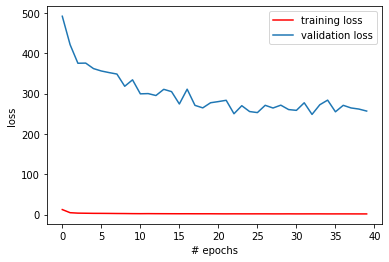

In [19]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()
